# Introduction to ggplot 


This notebook is based on the examples based on the mtcars dataset, which is included in the ggplot package. Many examples are taken from:  http://docs.ggplot2.org/current/ and the datacamp course. Another useful source is the ggplot cookbook (http://www.cookbook-r.com/Graphs/). 
To start with ggplot we have to load it first.


In [1]:
library(ggplot2)

The mtcars dataset contains information for 32 cars from motor trends magazine from 1973. This dataset is small, intuitive, and contains a variety of continuous and categorical variables.

The dataset is included in the ggplot package, so we don't have to read it in. We will start to have a first look at the dataset.

Description of the variables:
* mpg -- Miles/(US) gallon
* cyl -- Number of cylinders
* disp -- Displacement (cu.in.)
* hp -- Gross horsepower
* drat -- Rear axle ratio
* wt -- Weight (lb/1000)
* qsec -- 1/4 mile time
* vs -- V/S engine.
* am -- Transmission (0 = automatic, 1 = manual)
* gear -- Number of forward gears
* carb -- Number of carburetors

In [2]:
str(mtcars)


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


## Scatterplot

As we see, all variables are numeric. If we make a first plot, we may see that this is not completely correct.
A simple scatter plot will have the following syntax:
ggplot(_name dataset_, aes(x = _variable on the x-axis_, y = _name variable on the y-axis_)) +
  geom_point()
  
  Where aes stands for aesthetics and geom_point indicates we will produce a scatterplot. 
  We want to make a plot of mpg (miles per gallon) against cyl (cylinders) in the mtcars. So in our example we may plot:
  

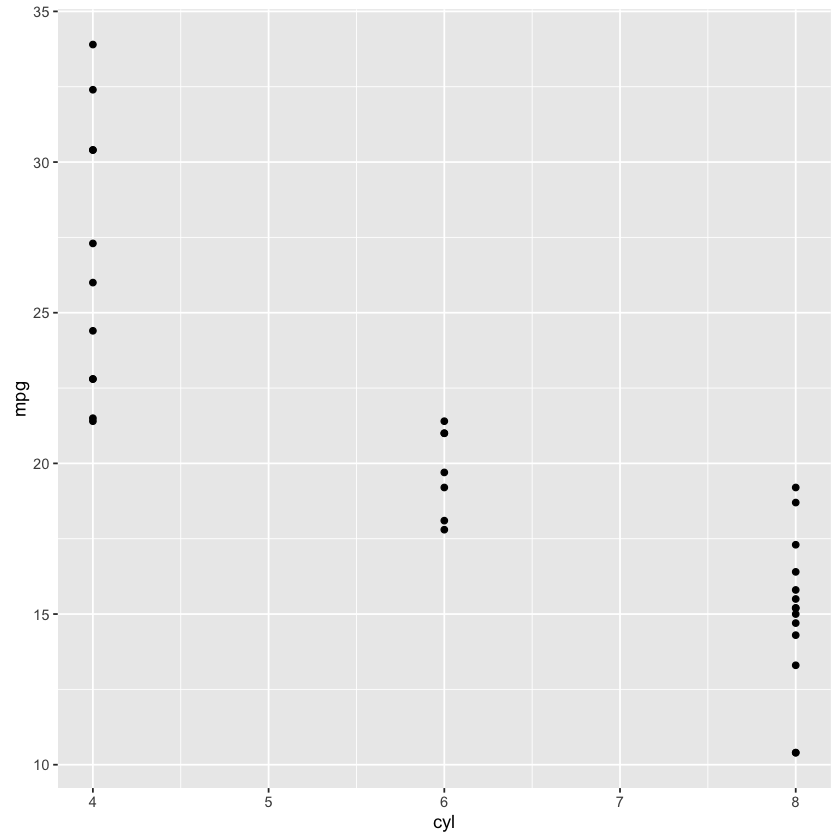

In [3]:
ggplot(mtcars, aes(x = cyl, y = mpg)) +
  geom_point()

Notice that ggplot2 treats cyl as a continuous variable. We get a plot, but it's not quite right, because it gives the impression that there is such a thing as a 5 or 7-cylinder car, which there is not.

We change the numerical variable cyl in a factor within the command, by wrapping the command _factor()_ around the variable cyl.

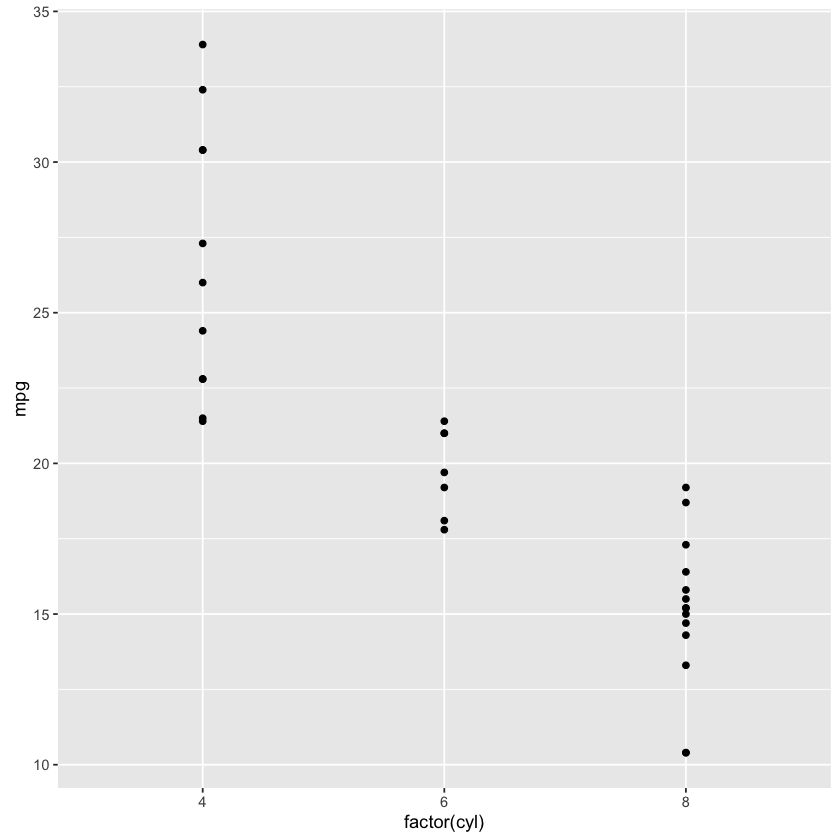

In [4]:
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) + geom_point()

We may want to distinguish different groups in the data, with different colors. We want to make a plot of mpg (miles per gallon) against wt (weight in 1,000 pounds) in the mtcars dataset.
E.g. The color should be dependent on the displacement of the car engine, found in _disp_.
A legend is automatically generated.
Colors are part of the aesthetics part of the command:


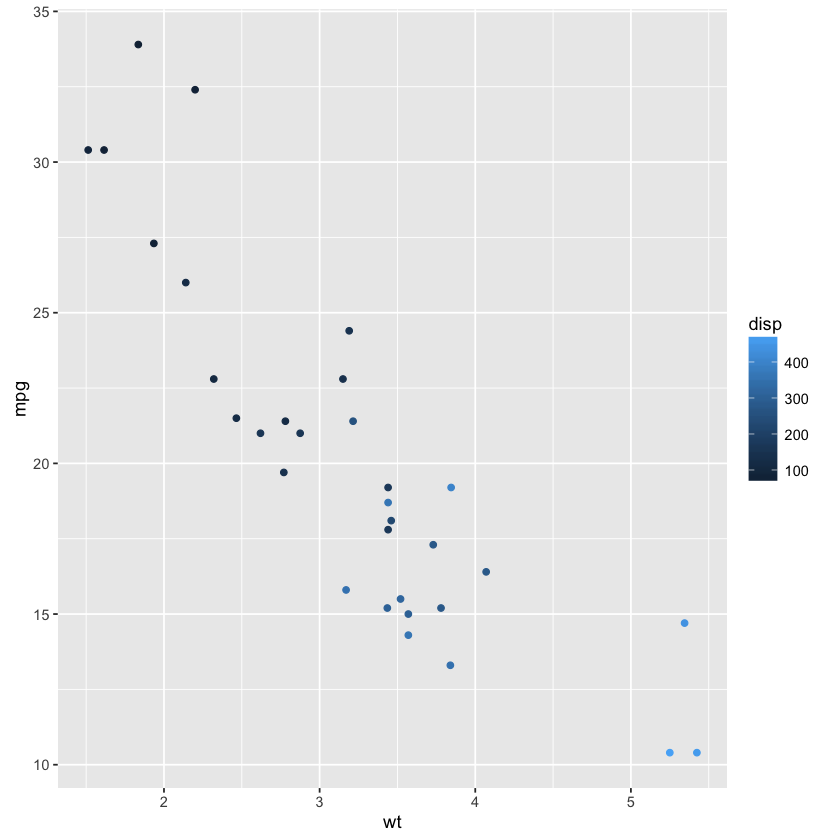

In [5]:
ggplot(mtcars, aes(x = wt, y = mpg, col = disp)) +
  geom_point()

We can also distinghuish different groups by varying the size of the observations:

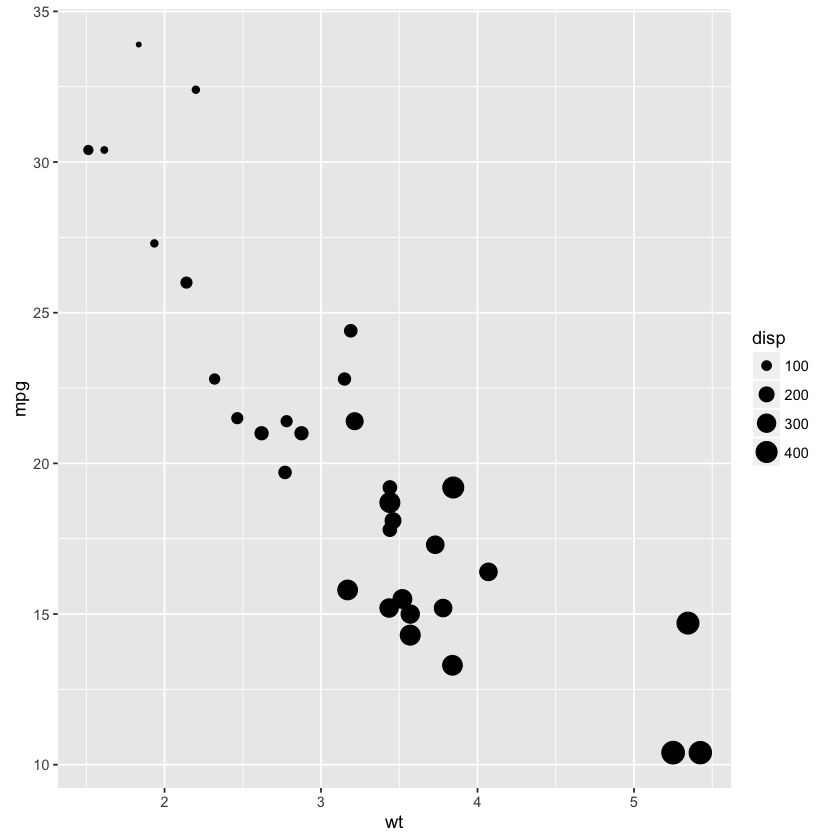

In [6]:
ggplot(mtcars, aes(x = wt, y = mpg, size = disp)) +
  geom_point()

We may also want to see if a linear regression makes sense. We can do that by adding geom_smooth. Between the brackets we should indicate the method. lm stand for a linear regression. The shaded area shows the 95% confidence interval.

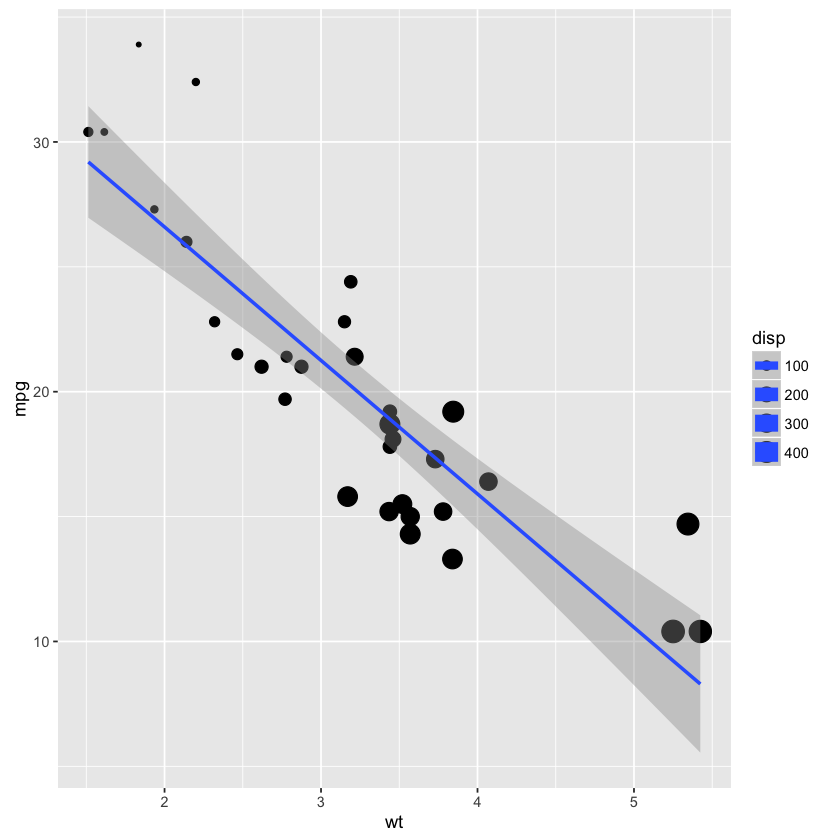

In [7]:
ggplot(mtcars, aes(x = wt, y = mpg, size = disp)) +geom_point()  + geom_smooth(method=lm)

If we don't want to show the shaded region, we can do that by:

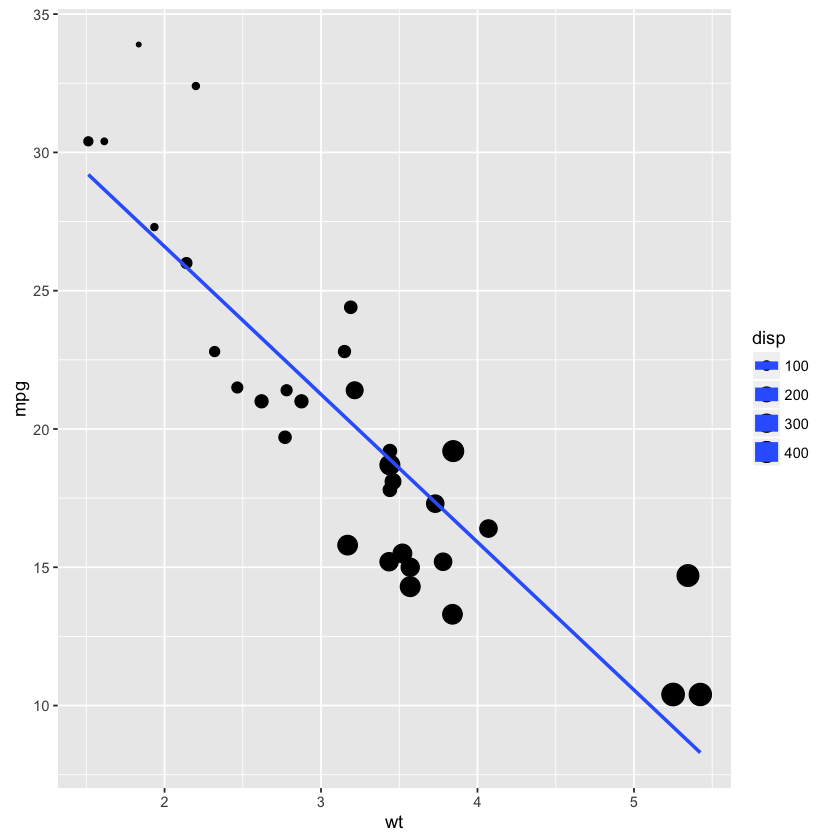

In [8]:
ggplot(mtcars, aes(x = wt, y = mpg, size = disp)) +geom_point()  + geom_smooth(method=lm, se=FALSE)

There is a difference between "mapping" and "attributes". Mapping are things that are changed within "aes" and attributes are changed within "geom". aes referts to varibles and the geom refers to the graph. In the graph hereunder, "col" gives different colours to the different kinds cylinders. If you would have changed col in "red" in the geom part, then the color of the dots would have been changed. In this case we change the size and the shape of the dots in the geom part.

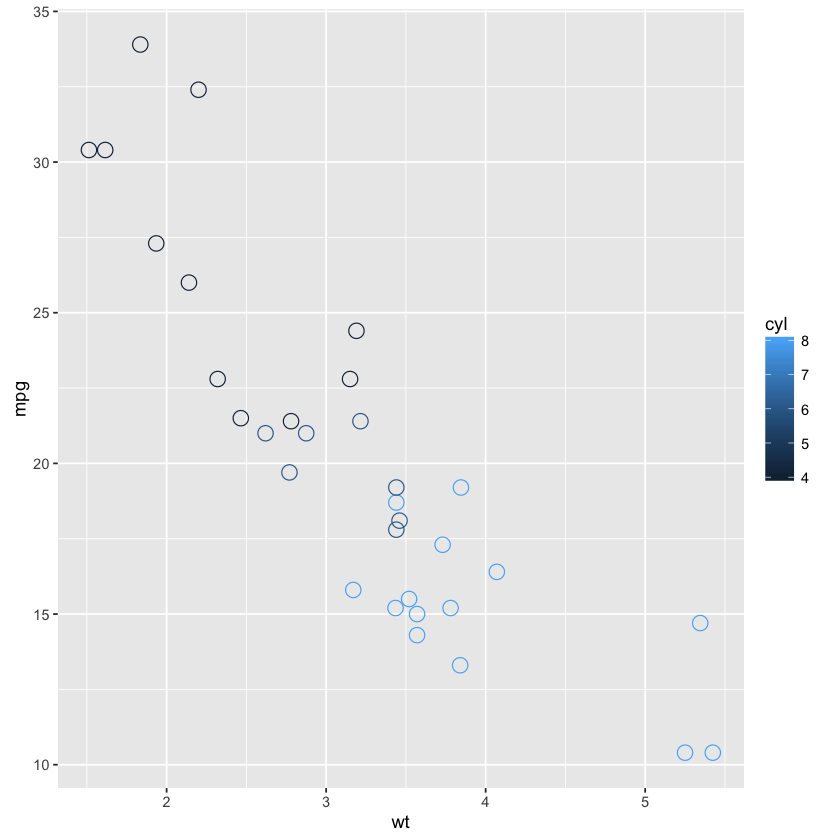

In [9]:
ggplot(mtcars, aes(x=wt, y=mpg, col=cyl)) + geom_point(shape=1, size=4)
  

We could also you use shape (and other commands) in the aes command. This is not advisable, but to give you a feel how it looks:

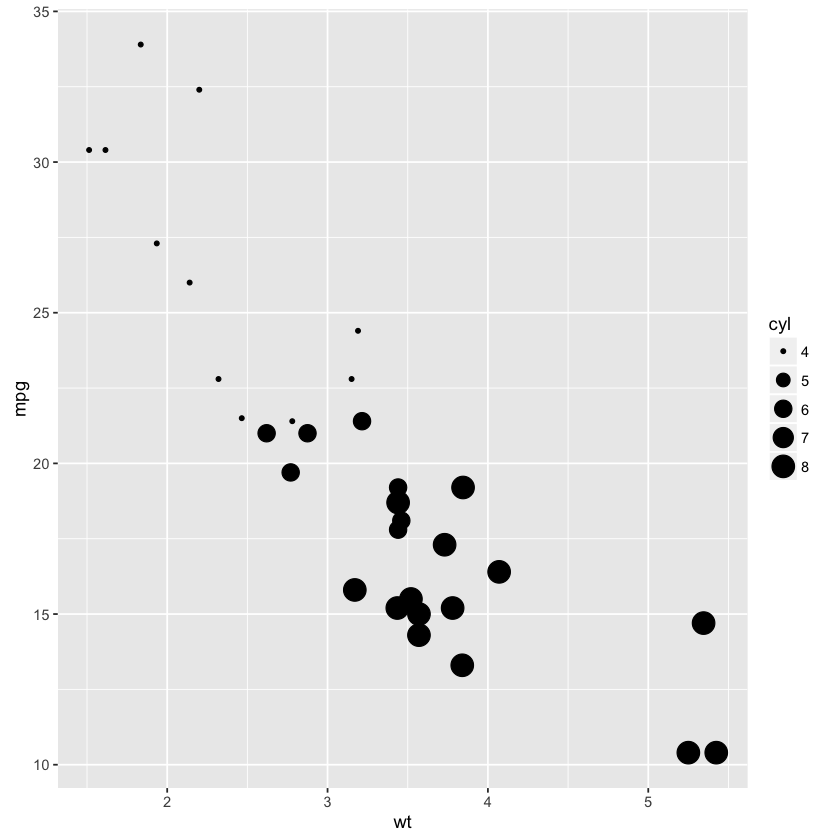

In [10]:
ggplot(mtcars, aes(x = wt, y = mpg, size = cyl)) + geom_point()

If we map different things into aes, we can plot a lot of variables in one graph. See for example:

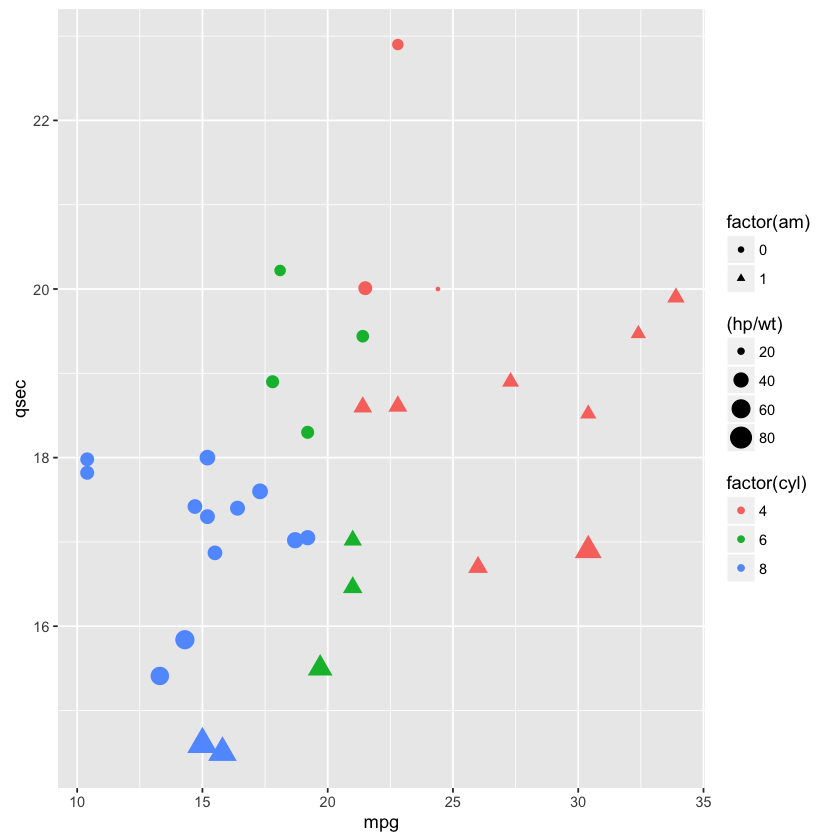

In [11]:
ggplot(mtcars, aes(x = mpg, y = qsec, col = factor(cyl), shape=factor(am), size=(hp/wt))) +
  geom_point()

If we want to showw the regressions per cylinder type, we should remember that cyl was a numeric variable. We will change cyl in a factor in the dataset with as.factor. Then we will plot the graphs.

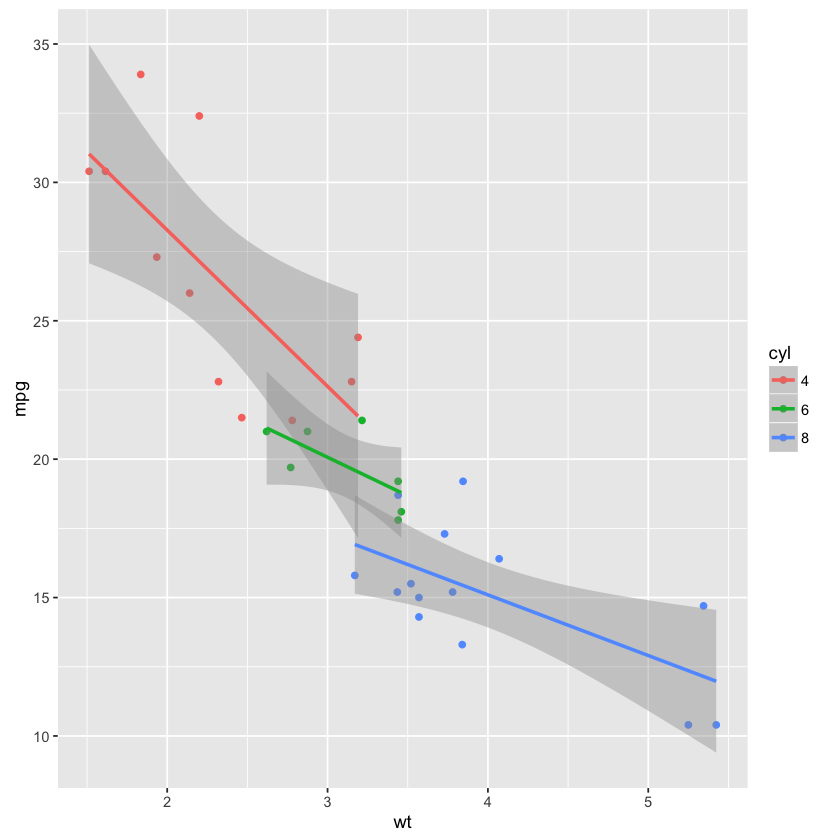

In [12]:
mtcars$cyl <- as.factor(mtcars$cyl)
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl)) + geom_point() + geom_smooth(method=lm)

Herunder we provide the same graph. But we added a regression line for the total dataset. To avoid confusion, we plotted the graph without the confidence interval. Notice further that we can add another type of line by setting the linetype to 2.

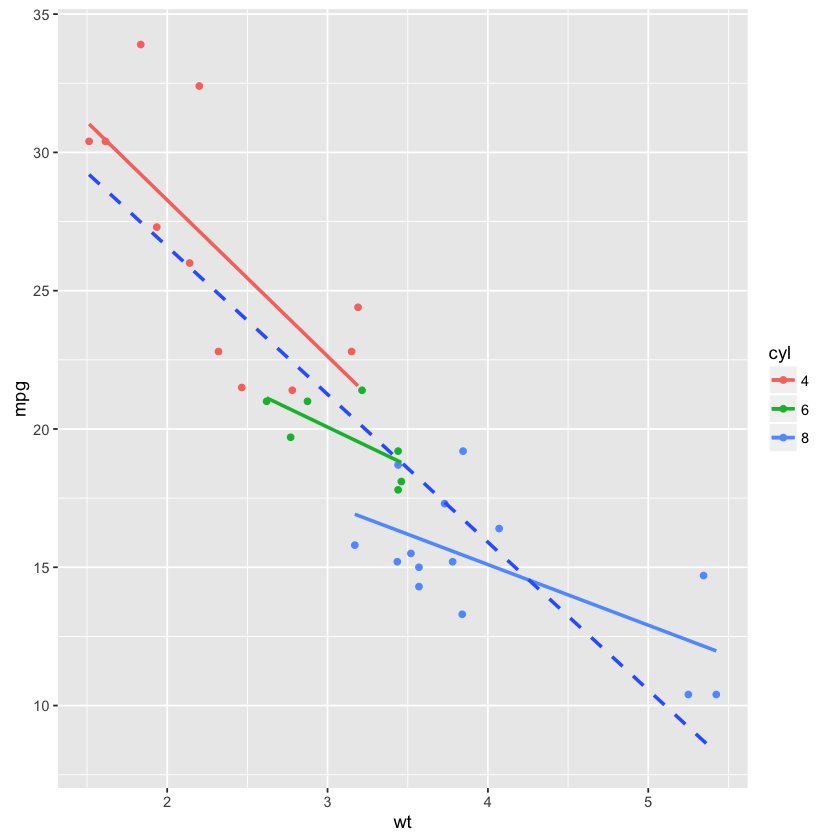

In [18]:
ggplot(mtcars, aes(x = wt, y = mpg, col = cyl)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  geom_smooth(aes(group = 1), method = lm, se = FALSE, linetype = 2)

## Bar chart

We will start with a simple bar chart and then gradually improve it. "Geom_bar" produces a bar chart.

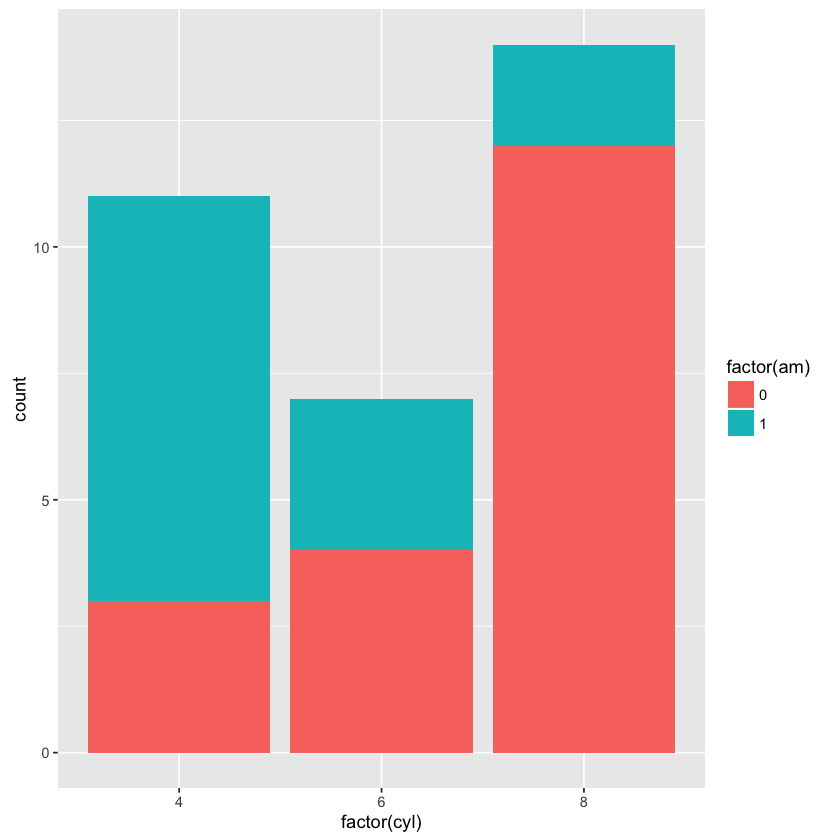

In [23]:
ggplot(mtcars, aes(x = factor(cyl), fill = factor(am))) + geom_bar()

The default setting of geom_bar is to "stack" the elements. If we set position to "dodge", the elements will be set next to each other:

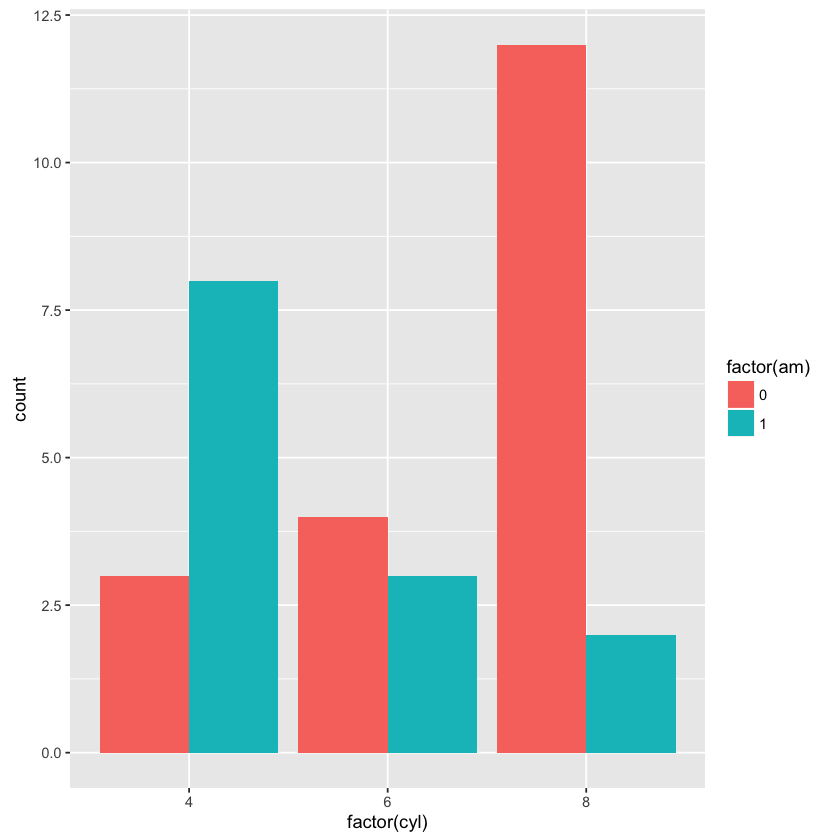

In [25]:
ggplot(mtcars, aes(x = factor(cyl), fill = factor(am))) + geom_bar(position= "dodge")

We will now make the graph a bit nicer. First, we set two new variables to be used in the legend: 
* the colors (set in newcol)
* the names we want in the legend (newlegend)

Then we will use the command of the graph above and add:
* a new name for the x-axis (we use scale_x to produce a new name. Because Cylinders was a factor, we will indicate the x-axis is on a discrete scale)
* a new name for the y-axis (scale_y_continuous)
* a new legend.

In [36]:
newcol = c("red", "blue")
newlegend = c("Manual", "Automatic")

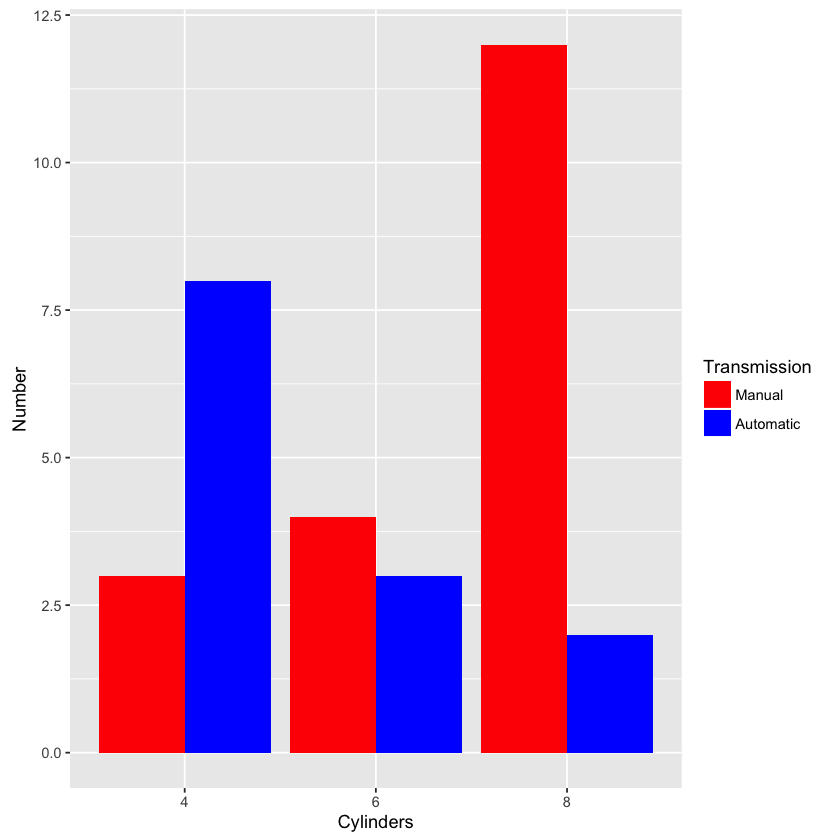

In [37]:
ggplot(mtcars, aes(x = factor(cyl), fill = factor(am))) + geom_bar(position= "dodge") +
scale_x_discrete("Cylinders") + 
    scale_y_continuous("Number") +
    scale_fill_manual("Transmission", 
                      values = newcol,
                      labels = newlegend) 

## Histograms

We now turn to a special category of bar plots: histograms. A histogram is a chart with an x-axis. The y-axis is a count (or a density). With our dataset we could for example make:


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


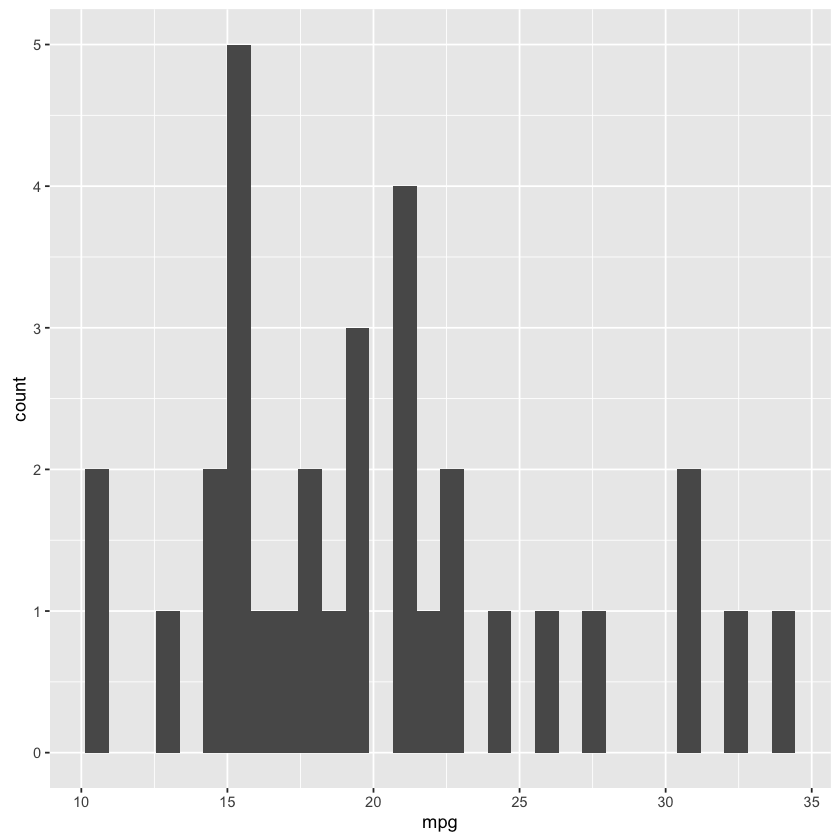

In [38]:
ggplot(mtcars, aes(x=mpg)) + geom_histogram()

Choosing binwidth is a bit of an art. The default binwidth is range/30, so we always get 30 evenly-sized bins. But, we can change this. In this example we set binwidth to 1 (so for each unit there is one bar).


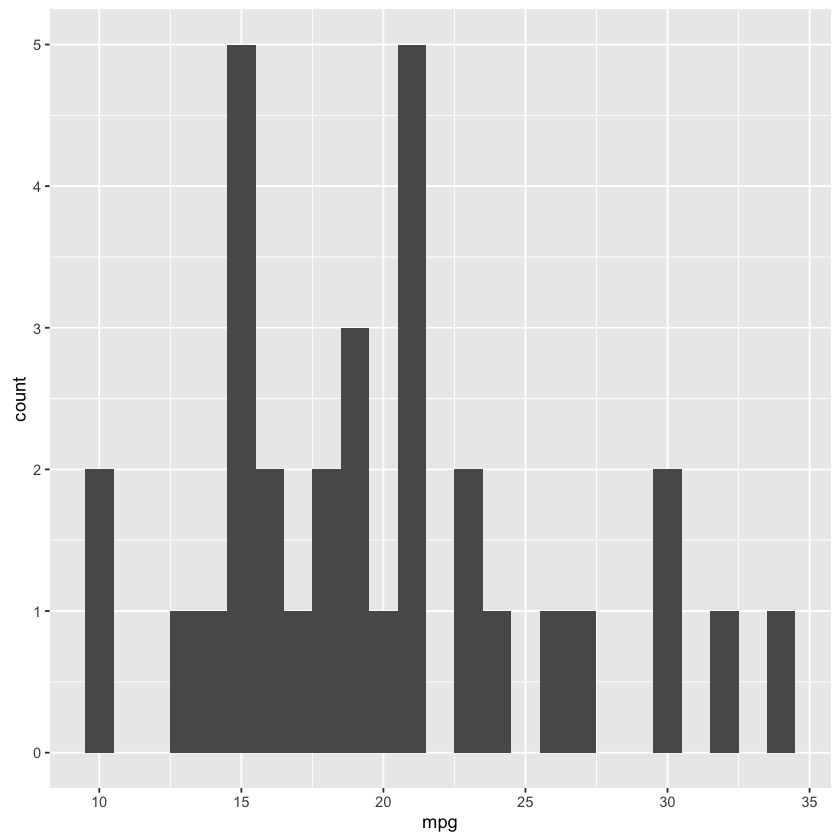

In [40]:
ggplot(mtcars, aes(x=mpg)) + geom_histogram(binwidth=1)

The default y-axis is count. To adjust this to density, access the internal binning statistics using the ..density.. notation. This looks for a variable called density in the internal data frame which is the result of the histograms binning statistic. The dots around "density" will tell ggplot to look at the internal statistics.


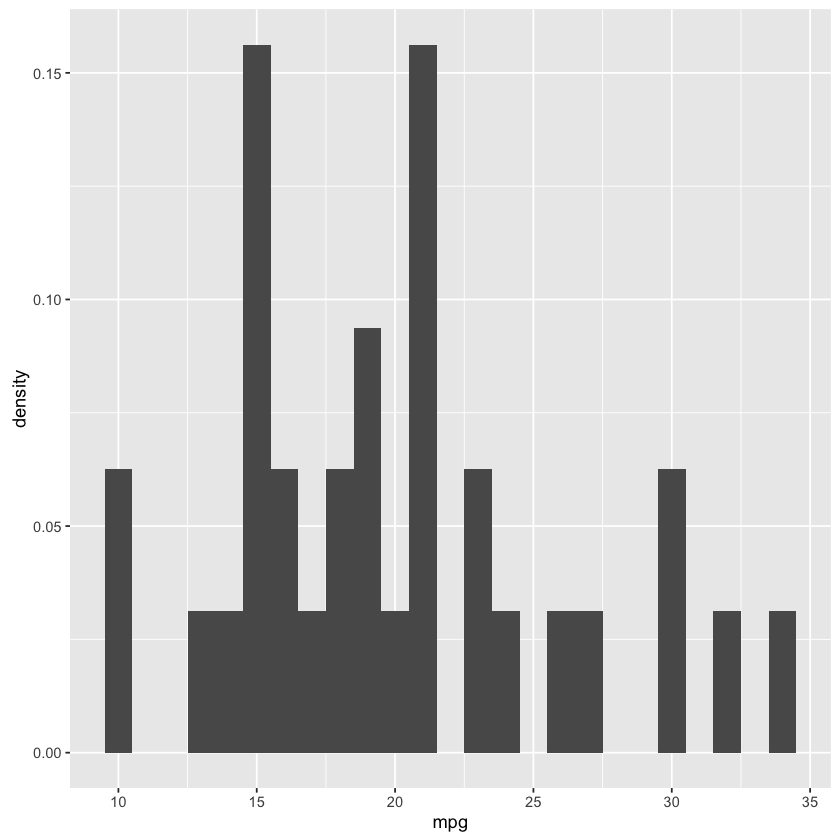

In [43]:
ggplot(mtcars, aes(x=mpg)) + geom_histogram(aes(y=..density..), binwidth=1)

We also can change the color of the histogram:

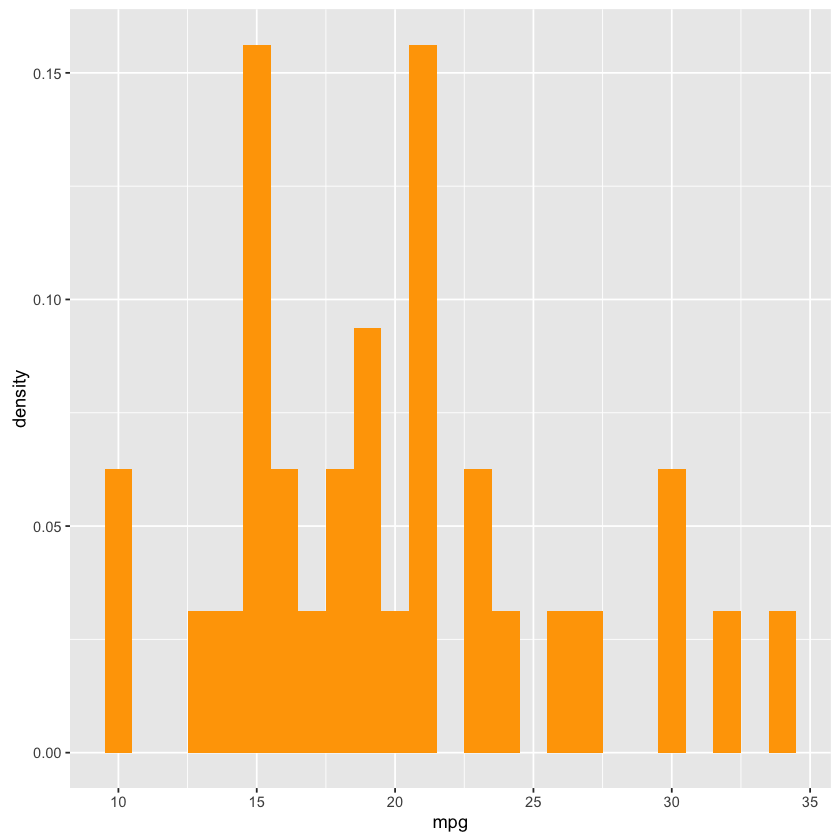

In [44]:
ggplot(mtcars, aes(x=mpg, y= ..density..)) + geom_histogram(aes(y=..density..), binwidth=1, fill="orange")

## Lineplots

For the lineplots we will use the economics dataframe, which contains time series for unemployment and population statistics from the Federal Reserve Bank of St. Louis in the US. The economics database is also a part of ggplot. We can look at the structure of the data first:

In [45]:
str(economics)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	574 obs. of  6 variables:
 $ date    : Date, format: "1967-07-01" "1967-08-01" ...
 $ pce     : num  507 510 516 513 518 ...
 $ pop     : int  198712 198911 199113 199311 199498 199657 199808 199920 200056 200208 ...
 $ psavert : num  12.5 12.5 11.7 12.5 12.5 12.1 11.7 12.2 11.6 12.2 ...
 $ uempmed : num  4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: int  2944 2945 2958 3143 3066 3018 2878 3001 2877 2709 ...


With geom_line we can create a simple line graph:


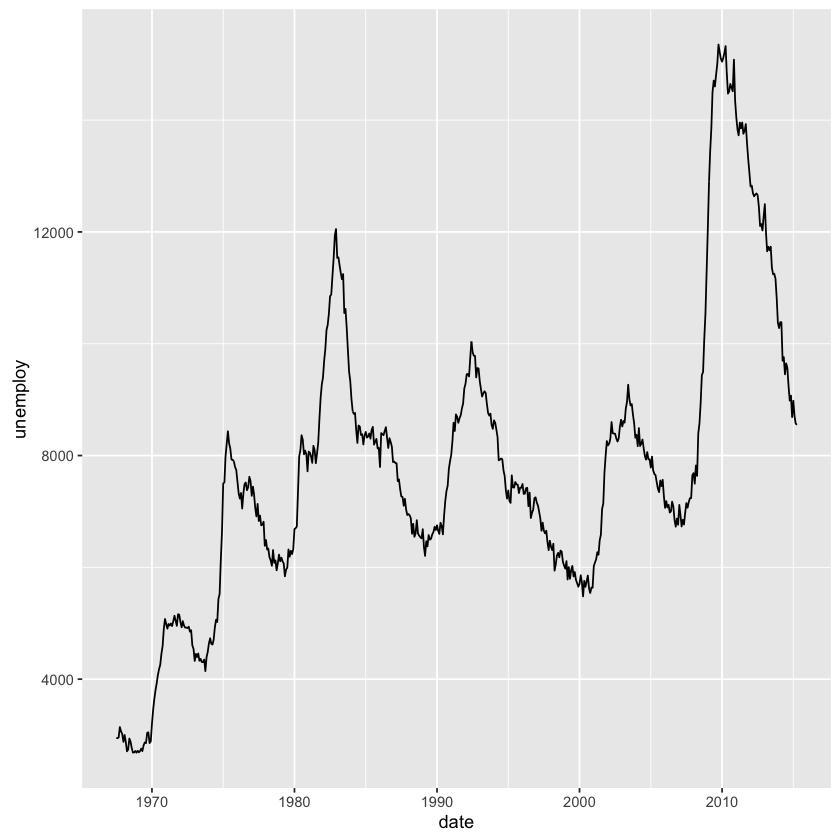

In [50]:
ggplot(economics, aes(x = date, y = unemploy)) + geom_line()